<h1 align='center'>Clothing recognition (Fashion MNIST)</h1>

Patryk Kośmider s16863 i Krzysztof Marek s16663

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras import models

Ładujemy dataset używając Kerasa

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

Potrzebujemy tablicy jednowymiarowej zamiast tablic w tablicy

Jako, że monochromatyczne obrazki nie mają osobnej tablicy na kolor musimy ją dodać.

In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)

In [8]:
X_test = X_test.reshape(-1, 28, 28, 1)

Klasy

In [9]:
classes = [ 't-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot' ]

Funkcja do wyświetlania obrazka

In [10]:
def show_image(X, y, index):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[index], interpolation = 'nearest')
    plt.xlabel(classes[y[index]])

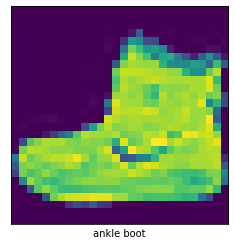

In [11]:
show_image(X_train, y_train, 0)

Normalizacja danych treningowych. Mimo, że operacje na zmiennych całkowitych są szybsze to jednak mniej dokładne. Lepsze wyniki osiągane są na zmiennych zmiennoprzecinkowych.

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Tworzymy model `Convolutional neural network`

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    # ~97% accuracy, 8s per epoch, 4ms per step
    # ~92% evaluation accuracy
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    # ~96% accuracy, 11s per epoch, 6ms per step
    # ~90% evaluation accuracy

    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    # ~94% accuracy, 14s per epoch, 9ms per step
    # ~90% evaluation accuracy
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

Kompilujemy nasz model. Używamy `sparse_categorical_crossentropy` gdyż wynik końcowy jest indeksem konkretnej klasy, pojedynczą wartością.

In [14]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = [ 'accuracy' ])

Trenujemy nasz model

In [15]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7639 - accuracy: 0.7168
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3925 - accuracy: 0.8559
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3289 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2923 - accuracy: 0.8925
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2639 - accuracy: 0.9016
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2430 - accuracy: 0.9111
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2254 - accuracy: 0.9161
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2064 - accuracy: 0.9243
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1854 - accuracy: 0.9325
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step 

Sprawdzamy jakość treningu

In [16]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3258 - accuracy: 0.8887


[0.32577061653137207, 0.888700008392334]

Dokonujemy predykcji

In [17]:
y_pred = cnn.predict(X_test)

Wybieramy najbardziej prawdobodobną klasę obiektu

In [18]:
y_classes = [ np.argmax(element) for element in y_pred ]

'sandal'

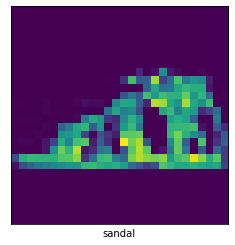

In [19]:
i = 11
show_image(X_test, y_test, i)
classes[y_classes[i]]